Problem Statement 21: 

Create stored functions for the following:


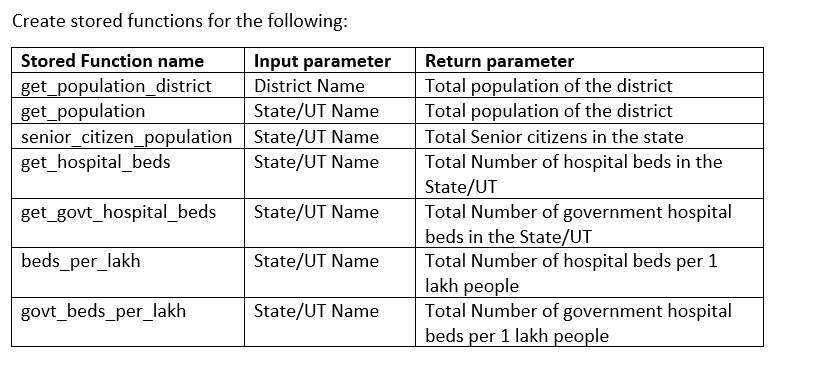

1) get_population_district

In [1]:
import pymysql
import pandas as pd

In [2]:
conn=pymysql.connect(
    host='localhost',
    user='root',
    password='Admin@123',
    db='python_project1')

In [39]:
query='CREATE PROCEDURE Get_population_district(Dist VARCHAR(50)) BEGIN SELECT sum(Population) from census where District=dist; END;'

In [5]:
cursor=conn.cursor()

In [41]:
cursor.execute(query)

0

In [6]:
query="call Get_population_district('Guntur')"

In [7]:
cursor.execute(query)

1

In [8]:
select=cursor.fetchall()

In [10]:
print('population of district is',select[0][0])

population of district is 4887813.0


2) get_population

In [50]:
query2='CREATE PROCEDURE get_population(state varchar(50)) begin select District,sum(Population) from census where StateorUT=state group by District; END;'

In [51]:
cursor.execute(query2)

0

In [12]:
query2="call get_population('Karnataka')"

In [13]:
cursor.execute(query2)

30

In [14]:
select=cursor.fetchall()

In [15]:
df=pd.DataFrame(select,columns=['District','Population'])
df

,District,Population
0,Bagalkot,1889752.00
1,Bangalore,9621551.00
2,Bangalore Rural,990923.00
3,Belgaum,4779661.00
4,Bellary,2452595.00
5,Bidar,1703300.00
6,Bijapur,2177331.00
7,Chamarajanagar,1020791.00
8,Chikkaballapura,1255104.00
9,Chikmagalur,1137961.00


3) Senior citizen Population

In [56]:
query='CREATE PROCEDURE senior_citizen_population(state varchar(50)) begin select sum(Senior_Citizen) from census where StateorUT=state; END;'

In [57]:
cursor.execute(query)

0

In [18]:
query2='CALL senior_citizen_population("Andhra Pradesh")'

In [19]:
cursor.execute(query2)

1

In [20]:
select=cursor.fetchall()

In [22]:
print("Senior citizen population of Andhra Pradesh",select[0][0])

Senior citizen population of Andhra Pradesh 9034557.0


4) get_hospital_beds

In [81]:
query4='CREATE PROCEDURE get_hospital_beds(state varchar(50)) begin select HospitalBeds from hospitals where StateorUT=state; END;'

In [82]:
cursor.execute(query4)

0

In [86]:
query4='call get_hospital_beds("Bihar")'

In [87]:
cursor.execute(query4)

1

In [88]:
select=cursor.fetchall()

In [89]:
print(select)

((17796,),)


5) Get government hospital beds

In [90]:
query5='CREATE PROCEDURE get_govt_hospital_beds(state varchar(50)) begin select bedsum from government_hospitals where StateorUT=state; END;'

In [91]:
cursor.execute(query5)

0

In [23]:
query5='call get_govt_hospital_beds("Tamil Nadu")'

In [24]:
cursor.execute(query5)

1

In [25]:
select=cursor.fetchall()
print("Government Hospital Beds in Tamil Nadu are",select[0][0])

Government Hospital Beds in Tamil Nadu are 77532


6) Beds per 1 lakh people

In [102]:
query6='CREATE PROCEDURE beds_per_lakh(state varchar(50)) begin select round((HospitalBeds/Population)*100000) from hospitals where StateorUT=state; END;'

In [103]:
cursor.execute(query6)

0

In [26]:
query6='call beds_per_lakh("Tamil Nadu")'

In [27]:
cursor.execute(query6)
select=cursor.fetchall()
for x in select:
    print("beds per lakh in Tamil Nadu",x[0])

beds per lakh in Tamil Nadu 101


7. GOVERNMENT BEDS PER 1 LAKH PEOPLE

In [114]:
query7='CREATE PROCEDURE govt_beds_per_lakh(state varchar(50)) begin select round((gh.bedsum/h.Population)*100000) from hospitals h join government_hospitals gh on gh.StateorUT=h.StateorUT where gh.StateorUT=state; END;'

In [115]:
cursor.execute(query7)

0

In [28]:
query7='call govt_beds_per_lakh("Bihar")'

In [29]:
cursor.execute(query7)
select=cursor.fetchall()
for x in select:
    print("GOVERNMENT BEDS PER 1 LAKH PEOPLE IN TAMIL NADU",x[0])

GOVERNMENT BEDS PER 1 LAKH PEOPLE IN TAMIL NADU 12


**22**

It was reported* that in the north-eastern states, senior citizens are facing some issues in getting beds in a government hospital. Amir, from the department of healthcare, has requested a report on the healthcare situation in the north-eastern states.


The north-eastern states are listed in (Data/north_east_states.txt). Read the file and extract the state names using python and write a query to find the following information about those states from the database. Use the stored functions created earlier wherever relevant.

*	State Name
*	Population
*	Senior Citizen Population
*	Number of Government Hospital
*	Number of Government Hospital Beds
*	Number of Government Hospital beds for 1 Lakh population 
(Round the number to the nearest integer)
*	Number of Government Hospital beds for 1 Lakh senior citizen
(Round the number to the nearest integer)

The rows should be sorted by the number of Government Hospital beds for 1 Lakh senior citizens in ascending order.



In [1]:
import pymysql
import pandas as pd

In [3]:
conn=pymysql.connect(
    host='localhost',
    user='root',
    password='Admin@123',
    db='python_project1')

In [4]:
df=pd.read_csv('Data/NorthEast.txt',header=None)
df

,0
0,Arunachal Pradesh
1,Mizoram
2,Manipur
3,Tripura
4,Assam
5,Meghalaya
6,Nagaland


In [5]:
list1=df[0].to_list()
list1

['Arunachal Pradesh',
 'Mizoram',
 'Manipur',
 'Tripura',
 'Assam',
 'Meghalaya',
 'Nagaland']

In [6]:
cursor=conn.cursor()

In [7]:
sql_query = cursor.execute('SELECT StateorUT, sum(Population),sum(Senior_Citizen) FROM census where StateorUT in ("Mizoram","Meghalaya","Nagaland","Assam","Arunachal Pradesh","Manipur","Tripura") group by StateorUT;')

In [8]:
sql_query=cursor.fetchall()

In [9]:
sql_query

(('Arunachal Pradesh', 1383727.0, 139635.0),
 ('Assam', 31205576.0, 4127732.0),
 ('Manipur', 2855794.0, 409796.0),
 ('Meghalaya', 2966889.0, 287754.0),
 ('Mizoram', 1097206.0, 144061.0),
 ('Nagaland', 1978502.0, 211983.0),
 ('Tripura', 3673917.0, 568604.0))

In [10]:
df=pd.DataFrame(sql_query,columns=['State','Population','Senior citizen'])

In [11]:
df

,State,Population,Senior citizen
0,Arunachal Pradesh,1383727.0,139635.0
1,Assam,31205576.0,4127732.0
2,Manipur,2855794.0,409796.0
3,Meghalaya,2966889.0,287754.0
4,Mizoram,1097206.0,144061.0
5,Nagaland,1978502.0,211983.0
6,Tripura,3673917.0,568604.0


In [36]:
tup =(list1,)

In [37]:
tup

(['Arunachal Pradesh',
  'Mizoram',
  'Manipur',
  'Tripura',
  'Assam',
  'Meghalaya',
  'Nagaland'],)

In [49]:
#government hospital beds

In [62]:
for x in list1:
    cursor.callproc('get_govt_hospital_beds', [x])
    rows = cursor.fetchall()
    df.loc[df['State']==x,'Government_Hospitals']=rows[0]

In [63]:
df

,State,Population,Senior citizen,Government_Hospitals,Beds_per_lakh,hospital_beds
0,Arunachal Pradesh,1383727.0,139635.0,2404.0,218,218.0
1,Assam,31205576.0,4127732.0,17142.0,1226,1226.0
2,Manipur,2855794.0,409796.0,1427.0,30,30.0
3,Meghalaya,2966889.0,287754.0,4457.0,157,157.0
4,Mizoram,1097206.0,144061.0,1997.0,90,90.0
5,Nagaland,1978502.0,211983.0,1880.0,36,36.0
6,Tripura,3673917.0,568604.0,4417.0,155,155.0


In [64]:
#number of beds per 1 lakh

In [65]:
for x in list1:
    cursor.callproc('beds_per_lakh',[x])
    rows=cursor.fetchall()
    df.loc[df['State']==x,'Beds_per_lakh']=rows[0]

In [66]:
df

,State,Population,Senior citizen,Government_Hospitals,Beds_per_lakh,hospital_beds
0,Arunachal Pradesh,1383727.0,139635.0,2404.0,168,218.0
1,Assam,31205576.0,4127732.0,17142.0,61,1226.0
2,Manipur,2855794.0,409796.0,1427.0,90,30.0
3,Meghalaya,2966889.0,287754.0,4457.0,155,157.0
4,Mizoram,1097206.0,144061.0,1997.0,211,90.0
5,Nagaland,1978502.0,211983.0,1880.0,98,36.0
6,Tripura,3673917.0,568604.0,4417.0,133,155.0


In [67]:
#number of government hospital beds

In [68]:
sql='select StateorUT,Hospital_Sum from government_hospitals where StateorUT in %s'
cursor.execute(sql, (tuple(list1),))
select=cursor.fetchall()

In [69]:
for x in select:
    print(x)

('Arunachal Pradesh', 218)
('Assam', 1226)
('Manipur', 30)
('Meghalaya', 157)
('Mizoram', 90)
('Nagaland', 36)
('Tripura', 155)


In [70]:
for x in select:
    df.loc[df['State']==x[0],'hospital_beds']=x[1]

In [71]:
df

,State,Population,Senior citizen,Government_Hospitals,Beds_per_lakh,hospital_beds
0,Arunachal Pradesh,1383727.0,139635.0,2404.0,168,218.0
1,Assam,31205576.0,4127732.0,17142.0,61,1226.0
2,Manipur,2855794.0,409796.0,1427.0,90,30.0
3,Meghalaya,2966889.0,287754.0,4457.0,155,157.0
4,Mizoram,1097206.0,144061.0,1997.0,211,90.0
5,Nagaland,1978502.0,211983.0,1880.0,98,36.0
6,Tripura,3673917.0,568604.0,4417.0,133,155.0


In [72]:
# 1 lakh senior citizen

In [74]:
sql='select c.StateorUT, round((sum(Senior_Citizen)*hospitals)/100000) from census c join hospitals h on c.stateorUT=h.stateorUT where c.stateorUT IN %s group by c.StateorUT;'
cursor.execute(sql,tup)
select=cursor.fetchall()

In [75]:
select


(('Arunachal Pradesh', 278.0),
 ('Assam', 50358.0),
 ('Manipur', 467.0),
 ('Meghalaya', 518.0),
 ('Mizoram', 125.0),
 ('Nagaland', 352.0),
 ('Tripura', 893.0))

In [76]:
for x in select:
    df.loc[df['State']==x[0],'hospital_beds_for_1lakh_senior_citizen']=x[1]

In [77]:
df

,State,Population,Senior citizen,Government_Hospitals,Beds_per_lakh,hospital_beds,hospital_beds_for_1lakh_senior_citizen
0,Arunachal Pradesh,1383727.0,139635.0,2404.0,168,218.0,278.0
1,Assam,31205576.0,4127732.0,17142.0,61,1226.0,50358.0
2,Manipur,2855794.0,409796.0,1427.0,90,30.0,467.0
3,Meghalaya,2966889.0,287754.0,4457.0,155,157.0,518.0
4,Mizoram,1097206.0,144061.0,1997.0,211,90.0,125.0
5,Nagaland,1978502.0,211983.0,1880.0,98,36.0,352.0
6,Tripura,3673917.0,568604.0,4417.0,133,155.0,893.0


In [78]:
df.sort_values('hospital_beds_for_1lakh_senior_citizen',inplace=True)

In [79]:
df

,State,Population,Senior citizen,Government_Hospitals,Beds_per_lakh,hospital_beds,hospital_beds_for_1lakh_senior_citizen
4,Mizoram,1097206.0,144061.0,1997.0,211,90.0,125.0
0,Arunachal Pradesh,1383727.0,139635.0,2404.0,168,218.0,278.0
5,Nagaland,1978502.0,211983.0,1880.0,98,36.0,352.0
2,Manipur,2855794.0,409796.0,1427.0,90,30.0,467.0
3,Meghalaya,2966889.0,287754.0,4457.0,155,157.0,518.0
6,Tripura,3673917.0,568604.0,4417.0,133,155.0,893.0
1,Assam,31205576.0,4127732.0,17142.0,61,1226.0,50358.0


23) The Government wants to run a scheme that would help people build in-premise toilets. 
For that purpose, a secretary has requested a district-wise report using the census data.

Using a stored procedure, Create a district-wise report that shows the total population of each district, the total number of households in the district, the number of households that do NOT have on-premise toilets, and the percentage of the number of households that do NOT toilets in premise to the total number of households. Sort the data in a way that is most useful for the secretary.


In [23]:
import pandas as pd


In [24]:
census=pd.read_csv('clean_Data/Clean_Data/clean_census.csv')
census

,Unnamed: 0,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Started
0,0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,6.007590e+05,178435.0,89679.000000,1481.0
1,1,Jammu and Kashmir,Badgam,753745.0,398041.0,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,5.032230e+05,160933.0,88978.000000,611.0
2,2,Laddakh,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,7.070300e+04,41515.0,21019.000000,250.0
3,3,Laddakh,Kargil,140802.0,77785.0,63017.0,86236.0,56301.0,29935.0,40370.0,7774.0,48144.0,8.753200e+04,35561.0,17488.000000,221.0
4,4,Jammu and Kashmir,Punch,476835.0,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,3.049790e+05,109818.0,61334.000000,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,635,Pondicherry,Mahe,41816.0,19143.0,22673.0,36470.0,16610.0,19860.0,0.0,12110.0,12110.0,1.976000e+04,12543.0,9428.000000,85.0
636,636,Pondicherry,Karaikal,200222.0,97809.0,102413.0,154916.0,79903.0,75013.0,35618.0,33715.0,69333.0,1.107321e+06,60089.0,301130.541139,366.0
637,637,Andaman and Nicobar Islands,Nicobars,36842.0,20727.0,16115.0,25332.0,15397.0,9935.0,15958.0,0.0,15958.0,1.878600e+04,12088.0,5922.000000,46.0
638,638,Andaman and Nicobar Islands,North and Middle Andaman,105597.0,54861.0,50736.0,78683.0,43186.0,35497.0,39091.0,1094.0,40185.0,5.735000e+04,30741.0,17464.000000,42.0


In [25]:
census.drop('Unnamed: 0',axis=1,inplace=True)

In [12]:
districtList=census['District'].tolist()

In [20]:
districtList

['Kupwara',
 'Badgam',
 'Leh(Ladakh)',
 'Kargil',
 'Punch',
 'Rajouri',
 'Kathua',
 'Baramula',
 'Bandipore',
 'Srinagar',
 'Ganderbal',
 'Pulwama',
 'Shupiyan',
 'Anantnag',
 'Kulgam',
 'Doda',
 'Ramban',
 'Kishtwar',
 'Udhampur',
 'Reasi',
 'Jammu',
 'Samba',
 'Chamba',
 'Kangra',
 'Lahul and Spiti',
 'Kullu',
 'Mandi',
 'Hamirpur',
 'Una',
 'Bilaspur',
 'Solan',
 'Sirmaur',
 'Shimla',
 'Kinnaur',
 'Gurdaspur',
 'Kapurthala',
 'Jalandhar',
 'Hoshiarpur',
 'Shahid Bhagat Singh Nagar',
 'Fatehgarh Sahib',
 'Ludhiana',
 'Moga',
 'Firozpur',
 'Muktsar',
 'Faridkot',
 'Bathinda',
 'Mansa',
 'Patiala',
 'Amritsar',
 'Tarn Taran',
 'Rupnagar',
 'Sahibzada Ajit Singh Nagar',
 'Sangrur',
 'Barnala',
 'Chandigarh',
 'Uttarkashi',
 'Chamoli',
 'Rudraprayag',
 'Tehri Garhwal',
 'Dehradun',
 'Garhwal',
 'Pithoragarh',
 'Bageshwar',
 'Almora',
 'Champawat',
 'Nainital',
 'Udham Singh Nagar',
 'Hardwar',
 'Panchkula',
 'Ambala',
 'Yamunanagar',
 'Kurukshetra',
 'Kaithal',
 'Karnal',
 'Panipat',
 'S

In [21]:
#Create a district-wise report that shows the total population of each district, the total number of households in the district, the number of households

In [22]:
df=census[['District','Population','Households']]

In [23]:
df

,District,Population,Households
0,Kupwara,870354.0,181664.0
1,Badgam,753745.0,187839.0
2,Leh(Ladakh),133487.0,54394.0
3,Kargil,140802.0,48144.0
4,Punch,476835.0,147408.0
...,...,...,...
635,Mahe,41816.0,12110.0
636,Karaikal,200222.0,69333.0
637,Nicobars,36842.0,15958.0
638,North and Middle Andaman,105597.0,40185.0


In [24]:
#the number of households that do NOT have on-premise toilets, and the percentage of the number of households that do NOT toilets in premise to the total number of households.

In [64]:
query='CREATE PROCEDURE not_on_premise(districts varchar(30)) begin select District,Households-(Households_Rural_Toilet_Premise+Households_Urban_Toilet_Premise) as no_on_premise from housing where District=districts; END;'

In [65]:
cursor.execute(query)

0

In [74]:
cursor.execute('call not_on_premise("Nashik")')

1

In [75]:
x=cursor.fetchall()
x[0][1]

519850.71875

In [76]:
for x in districtList:
    cursor.callproc('not_on_premise', [x])
    rows = cursor.fetchall()
    df.loc[df['District']==x,'Households_not_on_premise']=rows[0][1]

In [77]:
df

,District,Population,Households,Households_not_on_premise
0,Kupwara,870354.0,181664.0,87883.167969
1,Badgam,753745.0,187839.0,29438.630859
2,Leh(Ladakh),133487.0,54394.0,5127.388672
3,Kargil,140802.0,48144.0,1486.189941
4,Punch,476835.0,147408.0,117807.400391
...,...,...,...,...
635,Mahe,41816.0,12110.0,3027.500000
636,Karaikal,200222.0,69333.0,28766.880859
637,Nicobars,36842.0,15958.0,8361.992188
638,North and Middle Andaman,105597.0,40185.0,20807.586304


In [80]:
 df['Not percent']=(df['Households_not_on_premise']/df['Households'])*100

C:\Users\miles.MILE-BL-4748-LA.000\AppData\Local\Temp\ipykernel_14864\1091310343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Not percent']=(df['Households_not_on_premise']/df['Households'])*100


In [81]:
df

,District,Population,Households,Households_not_on_premise,Not percent
0,Kupwara,870354.0,181664.0,87883.167969,48.376766
1,Badgam,753745.0,187839.0,29438.630859,15.672268
2,Leh(Ladakh),133487.0,54394.0,5127.388672,9.426386
3,Kargil,140802.0,48144.0,1486.189941,3.086968
4,Punch,476835.0,147408.0,117807.400391,79.919272
...,...,...,...,...,...
635,Mahe,41816.0,12110.0,3027.500000,25.000000
636,Karaikal,200222.0,69333.0,28766.880859,41.490893
637,Nicobars,36842.0,15958.0,8361.992188,52.400001
638,North and Middle Andaman,105597.0,40185.0,20807.586304,51.779486


Problem Statement 24: 

**An Agency wants to find out if there is a relationship between dilapidated homes and the lack of households for the people.
Using a stored procedure, create a report that shows the name of each district, its population, the number of liveable houses per 1000 people, and the number of dilapidated households per 1000 people. 
Visualize the relation between these values using an appropriate plot.**


In [8]:
census=pd.read_csv('clean_Data/Clean_Data/clean_census.csv',usecols=['District','Population'])
census

,District,Population
0,Kupwara,870354.0
1,Badgam,753745.0
2,Leh(Ladakh),133487.0
3,Kargil,140802.0
4,Punch,476835.0
...,...,...
635,Mahe,41816.0
636,Karaikal,200222.0
637,Nicobars,36842.0
638,North and Middle Andaman,105597.0


In [14]:
#create a stored procedure

query='create procedure housesrel(districts varchar(30)) begin select h.District,c.population,round((round(h.Households_Rural_Livable + h.Households_Urban_Livable)/c.population)*1000,1) as liveable, round((round(h.Households_Rural_Dilapidated + h.Households_Urban_Dilapidated)/c.population)*1000,1) as dilapidated from housing h join census c on c.district=h.district where h.district=districts; END;'

In [ ]:
cursor.execute(query)

In [6]:
cursor.execute('call housesrel("Nashik")')

1

In [21]:
cursor.fetchall()

(('Nashik', 6107190.0, 95.9, 16.3),)

In [9]:
census[census['District']=='Darrang']

,District,Population
324,Darrang,928500.0


In [13]:
for x in districtList:
    cursor.callproc('housesrel', [x])
    rows = cursor.fetchall()
    census.loc[census['District']==x,'per1000liveable']=rows[0][2]
    census.loc[census['District']==x,'per1000dilapiated']=rows[0][3]

In [14]:
census[census['District']=='Darrang']

,District,Population,per1000liveable,per1000dilapiated
324,Darrang,928500.0,192.3,37.1


In [23]:
census

,District,Population,per1000liveable,per1000dilapiated
0,Kupwara,870354.0,119.0,16.4
1,Badgam,753745.0,110.9,9.2
2,Leh(Ladakh),133487.0,213.9,7.3
3,Kargil,140802.0,248.1,10.7
4,Punch,476835.0,173.6,6.9
...,...,...,...,...
635,Mahe,41816.0,68.3,2.0
636,Karaikal,200222.0,88.7,6.6
637,Nicobars,36842.0,159.4,9.1
638,North and Middle Andaman,105597.0,169.8,10.7


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


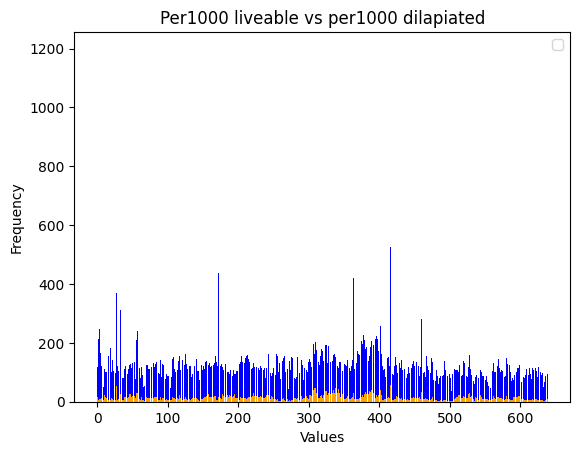

In [35]:
data1=census['per1000liveable']
data2=census['per1000dilapiated']

x = np.arange(len(districtList))
plt.bar(x, data1, color='blue')
plt.bar(x[-len(data2):], data2, color='orange')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Per1000 liveable vs per1000 dilapiated')
plt.legend()


plt.show()

25) The rural development department has requested a report on the healthcare situation in rural areas as compared to urban areas. Write a query to find the number of hospital beds and government hospital beds per 1 lakh people for rural and urban areas separately for each state, along with the difference between them


In [4]:
import pandas as pd

In [7]:
hospitaldata=pd.read_csv('clean_Data/Clean_Data/hospitals_clean.csv',usecols=['State/UT','Population','HospitalBeds'])

In [8]:
hospitaldata.head(5)

,State/UT,HospitalBeds,Population
0,Lakshadweep,250,64473
1,Daman and Diu,298,243247
2,Dadra and Nagar Haveli,568,343709
3,Sikkim,1145,610577
4,Andaman and Nicobar Islands,1246,380581


In [16]:
housingdata=pd.read_csv('clean_Data/Clean_Data/government_hospitals.csv',usecols=['State/UT','Rural_Government_Beds','Urban_Government_Beds'])

In [17]:
housingdata.head()

,State/UT,Rural_Government_Beds,Urban_Government_Beds
0,Daman and Diu,240,0
1,Lakshadweep,300,0
2,Dadra and Nagar Haveli,273,316
3,Chandigarh,0,778
4,Andaman and Nicobar Islands,575,500


In [18]:
ft=hospitaldata.merge(housingdata,how='inner',on="State/UT",suffixes=('_rural','_urban'))

In [19]:
ft

,State/UT,HospitalBeds,Population,Rural_Government_Beds,Urban_Government_Beds
0,Lakshadweep,250,64473,300,0
1,Daman and Diu,298,243247,240,0
2,Dadra and Nagar Haveli,568,343709,273,316
3,Sikkim,1145,610577,260,1300
4,Andaman and Nicobar Islands,1246,380581,575,500
5,Nagaland,1944,1978502,630,1250
6,Mizoram,2312,1097206,604,1393
7,Arunachal Pradesh,2320,1383727,2136,268
8,Manipur,2562,2855794,730,697
9,Goa,2666,1458545,1405,1608


In [36]:
ft['bedsperrural']=(ft['Rural_Government_Beds']/ft['Population'] * 100000)

In [38]:
ft['bedsperUrban']=(ft['Urban_Government_Beds']/ft['Population'] * 100000)

In [40]:
ft['difference']=abs(ft['bedsperrural']-ft['bedsperUrban'])

In [41]:
ft

,State/UT,HospitalBeds,Population,Rural_Government_Beds,Urban_Government_Beds,bedsperrural,bedsperUrban,difference
0,Lakshadweep,250,64473,300,0,465.311060,0.000000,465.311060
1,Daman and Diu,298,243247,240,0,98.665143,0.000000,98.665143
2,Dadra and Nagar Haveli,568,343709,273,316,79.427655,91.938238,12.510583
3,Sikkim,1145,610577,260,1300,42.582672,212.913359,170.330687
4,Andaman and Nicobar Islands,1246,380581,575,500,151.084789,131.378077,19.706712
5,Nagaland,1944,1978502,630,1250,31.842273,63.179112,31.336840
6,Mizoram,2312,1097206,604,1393,55.048915,126.958839,71.909924
7,Arunachal Pradesh,2320,1383727,2136,268,154.365709,19.367982,134.997727
8,Manipur,2562,2855794,730,697,25.562068,24.406522,1.155546
9,Goa,2666,1458545,1405,1608,96.328876,110.246856,13.917980
